In [1380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns

In [1381]:
pip install scikit-learn

9968.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1382]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [1383]:
df = pd.read_csv('/Users/liu/Desktop/kc_house_data.csv')

In [1384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1385]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [1386]:
# Drop irrelevant columns
df = df.drop(['id', 'date'], axis=1)
df = df.dropna()  # Drop rows with missing values
df = df.drop_duplicates()

In [1389]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.400984e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.671646e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: >

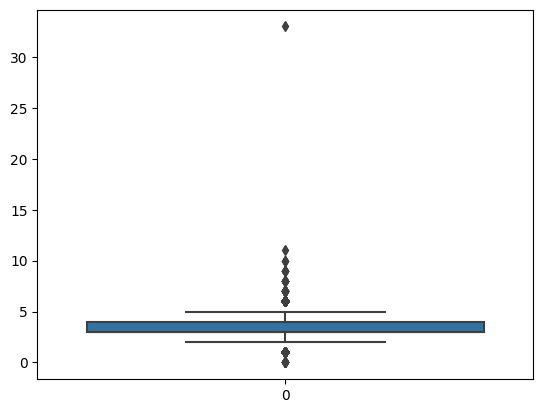

In [1390]:
#Find the outliner
sns.boxplot(df['bedrooms'])

In [1391]:
df[df['bedrooms'] > 30] 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


<Axes: >

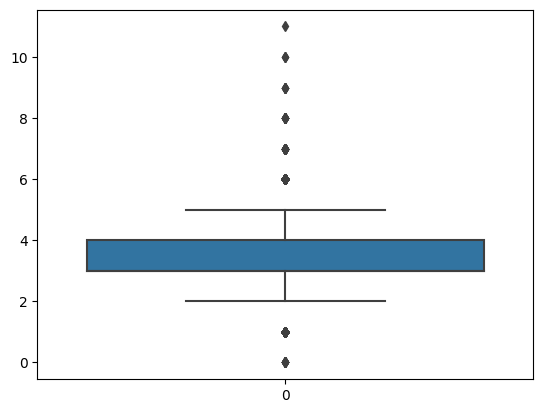

In [1392]:
#drop the outlier
drop_index = [15870]
df.drop(drop_index, axis =0, inplace = True)
sns.boxplot(df['bedrooms'])

In [1393]:
# Feature engineering
df['price_per_sqft_living'] = df['price']/df['sqft_living']
df['renovated_age'] = df.apply(lambda row: 2023 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)
df['house_age'] = 2023 - df['yr_built']  # Calculate age of the house
df = df.drop(['yr_built','yr_renovated'], axis=1)

In [1394]:
# Create variable for 'sqft_basement'
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
# Drop 'sqft_basement' column
df = df.drop('sqft_basement', axis=1)
# Create variable for grade_group'
df['grade_high'] = df['grade'].apply(lambda x: 1 if x >= 10 else 0)
# Create variable for good_view'
df['good_view'] = df['view'].apply(lambda x: 1 if x >=4 else 0)

In [1395]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovated_age,house_age,has_basement,grade_high,good_view
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,188.050847,0.0,68,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,209.338521,32.0,72,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,233.766234,0.0,90,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,308.163265,0.0,58,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,303.571429,0.0,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,47.6993,-122.346,1530,1509,235.294118,0.0,14,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,47.5107,-122.362,1830,7200,173.160173,0.0,9,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,47.5944,-122.299,1020,2007,394.216667,0.0,14,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,47.5345,-122.069,1410,1287,250.000000,0.0,19,0,0,0


In [1396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21607 non-null  float64
 1   bedrooms               21607 non-null  int64  
 2   bathrooms              21607 non-null  float64
 3   sqft_living            21607 non-null  int64  
 4   sqft_lot               21607 non-null  int64  
 5   floors                 21607 non-null  float64
 6   waterfront             21607 non-null  int64  
 7   view                   21607 non-null  int64  
 8   condition              21607 non-null  int64  
 9   grade                  21607 non-null  int64  
 10  sqft_above             21607 non-null  int64  
 11  zipcode                21607 non-null  int64  
 12  lat                    21607 non-null  float64
 13  long                   21607 non-null  float64
 14  sqft_living15          21607 non-null  int64  
 15  sqft_lo

In [1397]:
# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']
results = ols("price ~ lat + house_age + renovated_age + long + floors + good_view + waterfront + grade_high + bedrooms + has_basement + sqft_living + price_per_sqft_living", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:50:03   Log-Likelihood:            -2.8377e+05
No. Observations:               21607   AIC:                         5.676e+05
Df Residuals:                   21594   BIC:                         5.677e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.333e+

In [1398]:
# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']
results = ols("price ~ house_age + renovated_age + floors + good_view + waterfront + grade_high + bedrooms + has_basement + sqft_living + price_per_sqft_living", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.722e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:50:11   Log-Likelihood:            -2.8382e+05
No. Observations:               21607   AIC:                         5.677e+05
Df Residuals:                   21596   BIC:                         5.677e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -5.892e+

In [1399]:
"y_hat =  -5.892e+05 + 1.5906house_age + 627.5161renovated_age -6499.9234floors + 1.048e+05good_view + 2.157e+05waterfront + 9.357e+04grade_high + 5199.0135bedrooms + 9809.0777has_basement + 280.1969sqft_living+ 1982.7385price_per_sqft_living"

'y_hat =  -5.892e+05 + 1.5906house_age + 627.5161renovated_age -6499.9234floors + 1.048e+05good_view + 2.157e+05waterfront + 9.357e+04grade_high + 5199.0135bedrooms + 9809.0777has_basement + 280.1969sqft_living+ 1982.7385price_per_sqft_living'

In [1401]:
pred_vals = results.predict(df[['house_age','renovated_age', 'floors', 'good_view', 'waterfront', 'grade_high', 'bedrooms', 'has_basement', 'sqft_living', 'price_per_sqft_living']])

In [1403]:
pred_vals

0        123528.298911
1        578605.902080
2         94125.208577
3        595225.574486
4        492622.949333
             ...      
21608    302182.523388
21609    409231.719713
21610    475684.873748
21611    357462.101151
21612    325812.816707
Length: 21607, dtype: float64

In [1404]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [1405]:
res

,y_hat,price
0,123528.298911,221900.0
1,578605.902080,538000.0
2,94125.208577,180000.0
3,595225.574486,604000.0
4,492622.949333,510000.0
...,...,...
21608,302182.523388,360000.0
21609,409231.719713,400000.0
21610,475684.873748,402101.0
21611,357462.101151,400000.0


In [1408]:
res['error'] = res['y_hat'] - res['price']

In [1409]:
res.head(1)

,y_hat,price,error
0,123528.298911,221900.0,-98371.701089


In [1410]:
res['sq_error'] = res['error']**2

In [1411]:
np.sqrt(res['sq_error'].mean())

122567.71853069917

In [1412]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovated_age,house_age,has_basement,grade_high,good_view
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,...,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.400937e+05,3.369556,2.114754,2079.980238,1.511004e+04,1.494169,0.007544,0.234230,3.409404,7.656685,...,47.560044,-122.213889,1986.613551,12770.481835,264.147414,1.147452,51.998982,0.392651,0.075716,0.014764
std,3.671724e+05,0.908018,0.770252,918.521730,4.142583e+04,0.539912,0.086529,0.766185,0.650707,1.175502,...,0.138579,0.140831,685.422780,27307.583622,110.069380,6.325142,29.371689,0.488351,0.264550,0.120609
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,47.155900,-122.519000,399.000000,651.000000,87.588235,0.000000,8.000000,0.000000,0.000000,0.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.470850,-122.328000,1490.000000,5100.000000,182.259061,0.000000,26.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,47.571800,-122.230000,1840.000000,7620.000000,244.609060,0.000000,48.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.678000,-122.125000,2360.000000,10083.500000,318.321796,0.000000,72.000000,1.000000,0.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,6210.000000,871200.000000,810.138889,89.000000,123.000000,1.000000,1.000000,1.000000


(array([3.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 1.4000e+01,
        9.2000e+01, 1.0523e+04, 1.0911e+04, 5.7000e+01, 2.0000e+00]),
 array([-3504717.25337766, -3005879.38810269, -2507041.52282772,
        -2008203.65755275, -1509365.79227777, -1010527.9270028 ,
         -511690.06172783,   -12852.19645286,   485985.66882212,
          984823.53409709,  1483661.39937206]),
 <BarContainer object of 10 artists>)

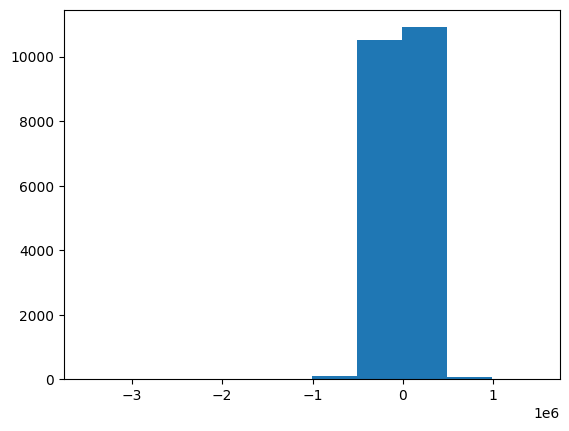

In [1413]:
plt.hist(res['error'])

(array([1.9015e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

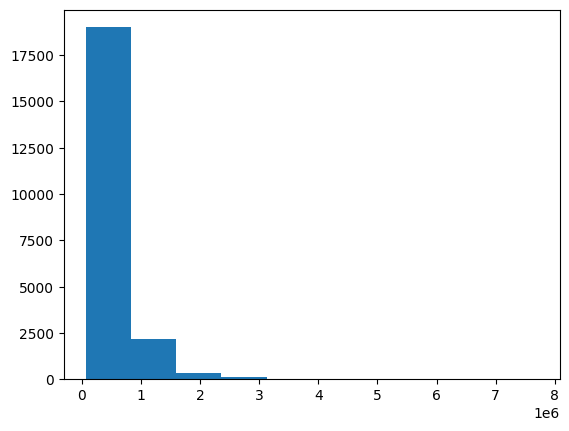

In [1414]:
plt.hist(df['price'])

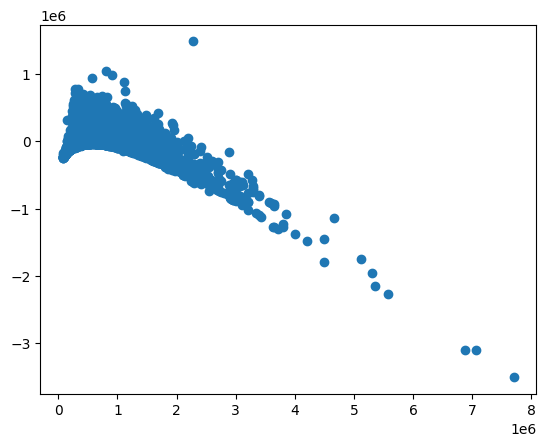

In [1415]:
plt.scatter(df['price'],res['error'])

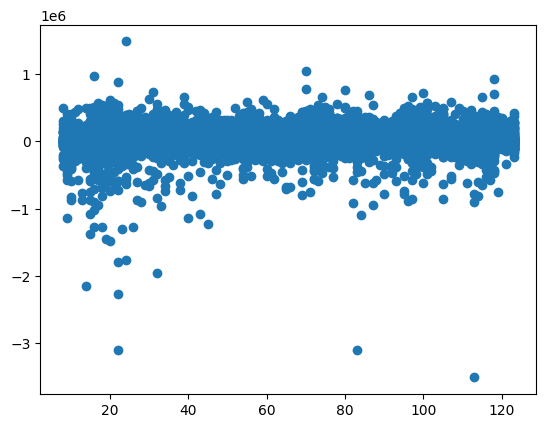

In [1416]:
plt.scatter(df['house_age'],res['error'])

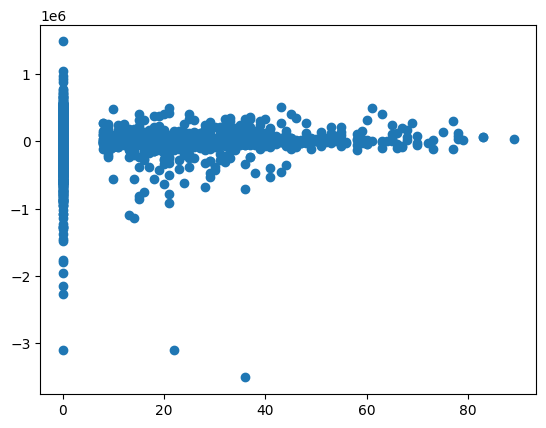

In [1417]:
plt.scatter(df['renovated_age'],res['error'])

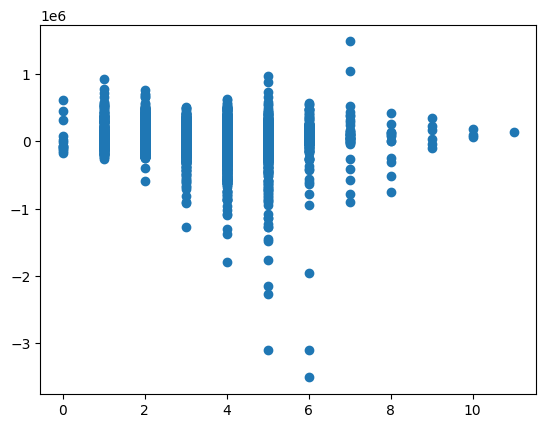

In [1420]:
plt.scatter(df['bedrooms'],res['error'])

((array([-3.99696983, -3.78174326, -3.66401218, ...,  3.66401218,
          3.78174326,  3.99696983]),
  array([-3504717.25337766, -3097780.97248274, -3096334.03600054, ...,
           977640.33410232,  1045652.41832892,  1483661.39937206])),
 (102886.38164261014, 1.0608379140257158e-09, 0.8392753336087073))

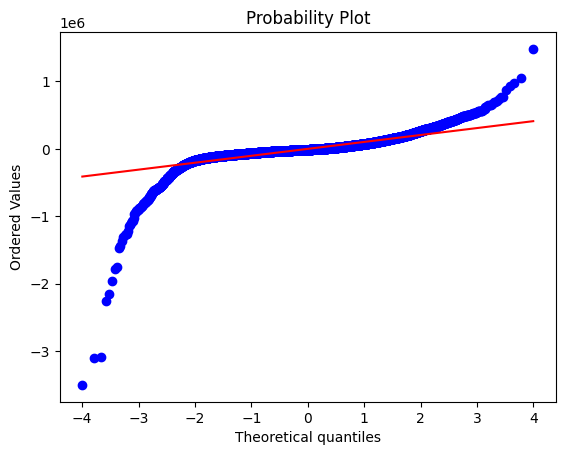

In [1421]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [1422]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_house_age  dfb_renovated_age  dfb_floors   
0           0.005597       0.002104          -0.000945   -0.003218  \
1          -0.000002      -0.000767          -0.010556   -0.003079   
2           0.005464       0.005746          -0.001853   -0.000369   
3          -0.000066      -0.000277          -0.000034   -0.000345   
4           0.001117      -0.001219           0.000112   -0.001551   
...              ...            ...                ...         ...   
21608      -0.001499      -0.000333          -0.000240    0.009211   
21609      -0.000130       0.000510          -0.000062   -0.000104   
21610      -0.003464       0.006602          -0.000796   -0.001890   
21611       0.001267      -0.002084           0.000193    0.001329   
21612      -0.000050       0.000060          -0.000008   -0.000028   

       dfb_good_view  dfb_waterfront  dfb_grade_high  dfb_bedrooms   
0           0.000712        0.000468        0.002459      0.000738  \
1           0.00051

In [1337]:
infl.summary_frame()

,dfb_Intercept,dfb_house_age,dfb_renovated_age,dfb_floors,dfb_good_view,dfb_waterfront,dfb_grade_high,dfb_bedrooms,dfb_has_basement,dfb_sqft_living,dfb_price_per_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.005597,0.002104,-0.000945,-0.003218,0.000712,0.000468,0.002459,0.000738,-0.004477,-0.003038,-0.004700,1.093418e-05,0.802461,0.000187,0.010967,0.802455,0.010967
1,-0.000002,-0.000767,-0.010556,-0.003079,0.000511,0.000678,0.000698,0.002518,-0.003372,-0.000859,0.002201,1.406613e-05,-0.331442,0.001406,-0.012439,-0.331436,-0.012439
2,0.005464,0.005746,-0.001853,-0.000369,0.000607,0.000209,0.002735,-0.004283,-0.003256,-0.001706,-0.004707,1.331450e-05,0.700558,0.000298,0.012102,0.700549,0.012102
3,-0.000066,-0.000277,-0.000034,-0.000345,-0.000079,-0.000007,-0.000043,0.000477,0.000480,-0.000247,0.000361,9.559833e-08,0.071578,0.000205,0.001025,0.071576,0.001025
4,0.001117,-0.001219,0.000112,-0.001551,-0.000060,-0.000084,-0.000357,-0.000029,-0.000985,0.000233,0.000835,4.216825e-07,0.141755,0.000231,0.002154,0.141752,0.002154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.001499,-0.000333,-0.000240,0.009211,0.000468,0.000054,0.000404,-0.000086,0.001726,-0.004260,-0.001455,1.143052e-05,0.471732,0.000565,0.011213,0.471723,0.011213
21609,-0.000130,0.000510,-0.000062,-0.000104,-0.000023,-0.000023,0.000203,-0.000316,0.000267,0.000111,0.000118,1.042081e-07,-0.075308,0.000202,-0.001071,-0.075306,-0.001071
21610,-0.003464,0.006602,-0.000796,-0.001890,0.000030,0.000714,0.000357,0.002618,-0.000263,0.003275,-0.005455,1.330187e-05,-0.600322,0.000406,-0.012096,-0.600313,-0.012096
21611,0.001267,-0.002084,0.000193,0.001329,0.000145,-0.000049,-0.000199,-0.000080,-0.000481,-0.001436,0.000207,1.854810e-06,0.346997,0.000169,0.004517,0.346990,0.004517


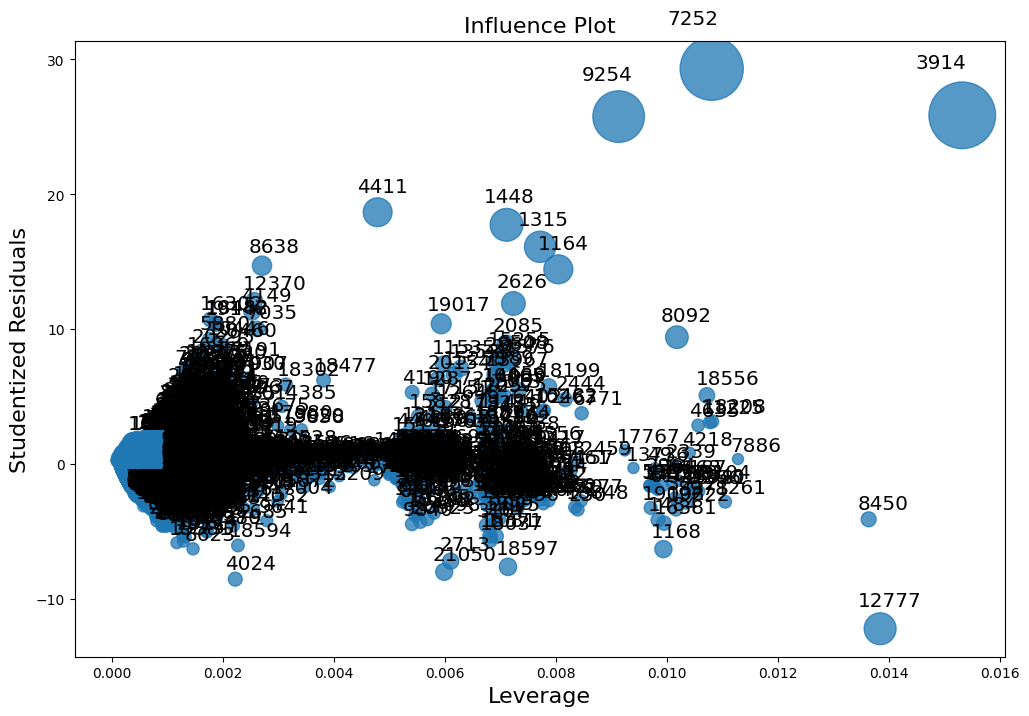

In [1338]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [1339]:
res

,y_hat,price,error,sq_error
0,123528.298911,221900.0,-98371.701089,9.676992e+09
1,578605.902080,538000.0,40605.902080,1.648839e+09
2,94125.208577,180000.0,-85874.791423,7.374480e+09
3,595225.574486,604000.0,-8774.425514,7.699054e+07
4,492622.949333,510000.0,-17377.050667,3.019619e+08
...,...,...,...,...
21608,302182.523388,360000.0,-57817.476612,3.342861e+09
21609,409231.719713,400000.0,9231.719713,8.522465e+07
21610,475684.873748,402101.0,73583.873748,5.414586e+09
21611,357462.101151,400000.0,-42537.898849,1.809473e+09


In [1340]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovated_age,house_age,has_basement,grade_high,good_view
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.400937e+05,3.369556,2.114754,2079.980238,1.511004e+04,1.494169,0.007544,3.409404,1788.449484,98077.941454,47.560044,-122.213889,1986.613551,12770.481835,264.147414,1.147452,51.998982,0.392651,0.075716,0.014764
std,3.671724e+05,0.908018,0.770252,918.521730,4.142583e+04,0.539912,0.086529,0.650707,828.144667,53.507849,0.138579,0.140831,685.422780,27307.583622,110.069380,6.325142,29.371689,0.488351,0.264550,0.120609
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235,0.000000,8.000000,0.000000,0.000000,0.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,3.000000,1190.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000,182.259061,0.000000,26.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,1560.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,244.609060,0.000000,48.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,4.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000,318.321796,0.000000,72.000000,1.000000,0.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.138889,89.000000,123.000000,1.000000,1.000000,1.000000


In [1341]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovated_age,house_age,has_basement,grade_high,good_view
0,221900.0,3,1.00,1180,5650,1.0,0,3,1180,98178,47.5112,-122.257,1340,5650,188.050847,0.0,68,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,2170,98125,47.7210,-122.319,1690,7639,209.338521,32.0,72,1,0,0


In [1443]:
# separate features and target
categorical_features = ['good_view', 'waterfront', 'grade_high','condition','has_basement']
numerical_features = ['renovated_age','house_age','bedrooms','bathrooms','sqft_living','price_per_sqft_living']
target = 'price'

In [1444]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [1445]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [1446]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [1447]:
from sklearn.metrics import mean_squared_error

In [1450]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [1451]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['good_view', 'waterfront',
                                                   'grade_high', 'condition',
                                                   'has_basement']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['renovated_age', 'house_age',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'price_per_sqft_living'])])),
                ('regressor', LinearRegression())])

In [1452]:
pred = linear_regression.predict(X_test)
pred
np.sqrt(mean_squared_error(pred,y_test))

124981.89349460397

In [1453]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [1454]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['good_view', 'waterfront',
                                                   'grade_high', 'condition',
                                                   'has_basement']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['renovated_age', 'house_age',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'price_per_sqft_living'])])),
                ('regressor', Ridge(alpha=3.0))])

In [1455]:
pred_ridge = ridge_regression.predict(X_test)
pred
np.sqrt(mean_squared_error(pred_ridge,y_test))


125032.86897743103

In [1456]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [1457]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['good_view', 'waterfront',
                                                   'grade_high', 'condition',
                                                   'has_basement']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['renovated_age', 'house_age',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'price_per_sqft_living'])])),
                ('regressor', Lasso())])

In [1458]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))

125031.96220950715

In [1460]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [1461]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['good_view', 'waterfront',
                                                   'grade_high', 'condition',
                                                   'has_basement']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['renovated_age', 'house_age',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'price_per_sqft_living'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [1462]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

139677.1472642528